## Business Analytics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_excel("Store data.xlsx")
data.head()

,STORE_ID,FAMILY_DESC,YEAR,MONTH,SALES_UNITS,SALES_TESP,SALES_TISP,GROSS_MARGIN,SPACE,NDSA,TXNS,FORMAT,SUMOFPOPULATION,TOTAL_SPACE,TOTAL_TISP,Region
0,10,Basic Sun Preparations,2007,2,276,1154.37,1356.44,592.81,18,777,68936,Convenience,525825,442.0,94679.84,3
1,10,Basic Sun Preparations,2007,3,268,1074.10,1262.13,517.88,18,777,68936,Convenience,525825,442.0,94679.84,3
2,10,Basic Sun Preparations,2007,4,310,1205.60,1416.68,597.74,18,777,68936,Convenience,525825,442.0,94679.84,3
3,10,Basic Sun Preparations,2007,1,299,1253.21,1472.53,679.61,18,777,68936,Convenience,525825,442.0,94679.84,3
4,10,Basic Sun Preparations,2007,6,714,2820.43,3314.06,1306.18,18,777,68936,Convenience,525825,442.0,94679.84,3


__Total Store formats:__

In [3]:
data['FORMAT'].unique()

array(['Convenience', 'Chemist', 'Destination'], dtype=object)

 __The total tax-included sales of store #19:__

In [4]:
SALES_TISP_19 = data[data['STORE_ID']==19]['SALES_TISP']
print('Total tax-included sales of store #19 is ',sum(SALES_TISP_19))

Total tax-included sales of store #19 is  8557.75


In [5]:
stores = data['STORE_ID'].unique()
print('Total Stores available ',len(stores))

Total Stores available  113


__Stores in this dataset do not have 12 months of data__

In [6]:
count = 0
for i in stores:
    if len(data[data['STORE_ID']==i]) != 12:
        count += 1
print("Total Stores in this dataset do not have 12 months of data is ", count)

Total Stores in this dataset do not have 12 months of data is  54


__Rename the regions as:<br> 
1 -> South, <br>
2 -> Pacific, <br>
3 -> Mid-Atlantic__<br>

In [7]:
data['Region'] = data['Region'].replace(1,'South')
data['Region'] = data['Region'].replace(2,'Pacific')
data['Region'] = data['Region'].replace(3,'Mid-Atlantic')

In [8]:
data['Region'].unique()

array(['Mid-Atlantic', 'Pacific', 'South'], dtype=object)

__Add the following columns:__ <br>
__1: Average Price - (Sales_Tisp/Sales_Units) <br>
2: Space Yield - (Sales_Tisp/Space) <br>
3: NDSA Yield - (Sales_Tisp/NDSA)__ <br>

In [9]:
data['Average Price'] = data['SALES_TISP']/data['SALES_UNITS']
data['Space Yield'] = data['SALES_TISP']/data['SPACE']
data['NDSA Yield'] = data['SALES_TISP']/data['NDSA']

In [10]:
data.head()

,STORE_ID,FAMILY_DESC,YEAR,MONTH,SALES_UNITS,SALES_TESP,SALES_TISP,GROSS_MARGIN,SPACE,NDSA,TXNS,FORMAT,SUMOFPOPULATION,TOTAL_SPACE,TOTAL_TISP,Region,Average Price,Space Yield,NDSA Yield
0,10,Basic Sun Preparations,2007,2,276,1154.37,1356.44,592.81,18,777,68936,Convenience,525825,442.0,94679.84,Mid-Atlantic,4.914638,75.357778,1.745740
1,10,Basic Sun Preparations,2007,3,268,1074.10,1262.13,517.88,18,777,68936,Convenience,525825,442.0,94679.84,Mid-Atlantic,4.709440,70.118333,1.624363
2,10,Basic Sun Preparations,2007,4,310,1205.60,1416.68,597.74,18,777,68936,Convenience,525825,442.0,94679.84,Mid-Atlantic,4.569935,78.704444,1.823269
3,10,Basic Sun Preparations,2007,1,299,1253.21,1472.53,679.61,18,777,68936,Convenience,525825,442.0,94679.84,Mid-Atlantic,4.924849,81.807222,1.895148
4,10,Basic Sun Preparations,2007,6,714,2820.43,3314.06,1306.18,18,777,68936,Convenience,525825,442.0,94679.84,Mid-Atlantic,4.641541,184.114444,4.265199


__The total sales for each format by month:__

In [1]:
#list(data.groupby(data['MONTH']))

### Visualization:

__A histogram for shelf space usage__

Text(0.5, 0, 'shelf Number')

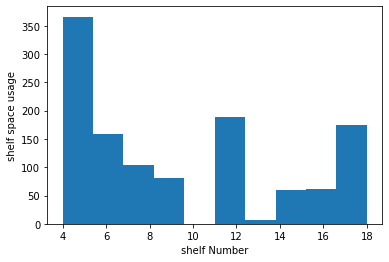

In [12]:
plt.hist(data['SPACE'], density=False)
plt.ylabel('shelf space usage')
plt.xlabel('shelf Number')

__A scatter plot for Sales (SALES_TISP) vs. Shelf Space (SPACE)__

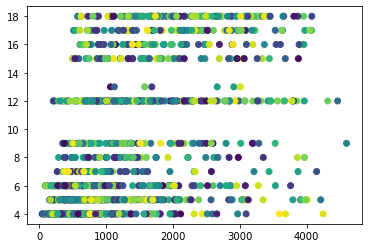

In [13]:
#Sales (SALES_TISP) vs. Shelf Space (SPACE)
x = data['SALES_TISP']
y = data['SPACE']
N = len(data['SPACE'])
colors = np.random.rand(N)
plt.scatter(x, y, c=colors)
plt.show()

### Machine Learning:


__A model to predict store sales (Sales_Tisp)__

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [15]:
data.head()

,STORE_ID,FAMILY_DESC,YEAR,MONTH,SALES_UNITS,SALES_TESP,SALES_TISP,GROSS_MARGIN,SPACE,NDSA,TXNS,FORMAT,SUMOFPOPULATION,TOTAL_SPACE,TOTAL_TISP,Region,Average Price,Space Yield,NDSA Yield
0,10,Basic Sun Preparations,2007,2,276,1154.37,1356.44,592.81,18,777,68936,Convenience,525825,442.0,94679.84,Mid-Atlantic,4.914638,75.357778,1.745740
1,10,Basic Sun Preparations,2007,3,268,1074.10,1262.13,517.88,18,777,68936,Convenience,525825,442.0,94679.84,Mid-Atlantic,4.709440,70.118333,1.624363
2,10,Basic Sun Preparations,2007,4,310,1205.60,1416.68,597.74,18,777,68936,Convenience,525825,442.0,94679.84,Mid-Atlantic,4.569935,78.704444,1.823269
3,10,Basic Sun Preparations,2007,1,299,1253.21,1472.53,679.61,18,777,68936,Convenience,525825,442.0,94679.84,Mid-Atlantic,4.924849,81.807222,1.895148
4,10,Basic Sun Preparations,2007,6,714,2820.43,3314.06,1306.18,18,777,68936,Convenience,525825,442.0,94679.84,Mid-Atlantic,4.641541,184.114444,4.265199


#### Converting Categorical data into values:


In [16]:
df = pd.get_dummies(data['Region']) 
data=pd.concat([data,df], axis=1)

In [17]:
y = data['SALES_TISP'] #Dependent Variables
x = data.drop(['SALES_TISP','FAMILY_DESC','FORMAT','Region'],axis=1) ## Independent Variables (Dropping unnecessary columns)

__Spliting data into training & testing for validation:__

In [18]:
train_x, test_x, train_Y, test_Y = train_test_split(x, y, test_size=0.2, random_state=42)

__Function to calculate RMSE value:__

In [19]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

__Linear Regression Algorithm:__

In [20]:
print("**************** LinearRegression Model ****************")
reg = LinearRegression()               #Model
reg.fit(train_x, train_Y)              #Data fitting into the model

predicted_L = reg.predict(test_x)      #Predicting the values

print('\nModel Score: ',reg.score(test_x, test_Y)) #Calculating Model score 

print('\nRMSE value for LinearRegression Model : ',  rmse(predicted_L, test_Y)) #Calculating RMSE score of the model


**************** LinearRegression Model ****************

Model Score:  0.9999999967548227

RMSE value for LinearRegression Model :  0.05283454979629389


__Random Forest Algorithm:__

In [21]:
print("**************** Random Forest Model ****************")
regr_R = RandomForestRegressor(max_depth=2, random_state=0)   #Model

regr_R.fit(train_x, train_Y)                                  #Data fitting into the model

predicted_R = regr_R.predict(test_x)                         #Predicting the values

print('\nModel Score: ',regr_R.score(test_x, test_Y))         #Calculating Model score
print('\nRMSE value for Random Forest Model : ', rmse(predicted_R, test_Y)) #Calculating RMSE score of the model

**************** Random Forest Model ****************

Model Score:  0.93204819283768

RMSE value for Random Forest Model :  241.7682680814229


__Author: Pranav Khiste<br>
Northeastern University<br>
https://github.com/pranav0904__<br>